<center><h1><b><font size="5">KNN vs Linear Regression: A Non Linear Problem</font></b></h1></center>

#### Importing the relevant libraries

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

from math import sin 

import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

#### Defining the regression 

In [2]:
def non_linear_regression(n_samples, noise = 0, random_state = None):
    
    if random_state:
        np.random.seed(random_state)
        
    uni = lambda n : np.random.uniform(-2, 2, n)
    add_noise = lambda n : np.random.normal(0, 1, n)
    
    x = []
    x = uni(n_samples)
    x.sort()
    
    y_raw = [i**2 + sin(5*i) for i in x]
    y = y_raw + noise * np.std(y_raw) * add_noise(n_samples)
    
    return x, y

#### Display the data with and without noise 

In [3]:
inputs_no_noise, target_no_noise = non_linear_regression(300, 0, 365)
inputs, target = non_linear_regression(300, 0.5, 365)

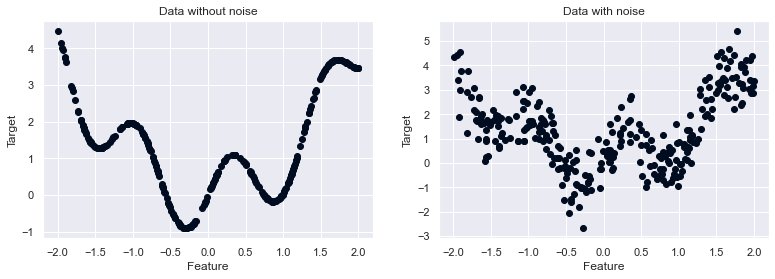

In [4]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax1.set_title('Data without noise')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.scatter(inputs, target, color = '#000C1F')
ax2.set_title('Data with noise')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

#### Split the data into training and testing sets. Visualize both datasets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 365)

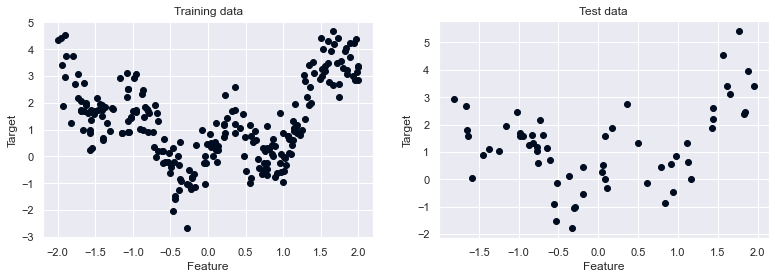

In [6]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.scatter(x_train, y_train, color = '#000C1F')
ax1.set_title('Training data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.scatter(x_test, y_test, color = '#000C1F')
ax2.set_title('Test data')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

plt.show()

#### Fit a linear regression and multiple KNN -regression. Calculate the MSE 

In [7]:
reg_lin = LinearRegression()
reg_lin.fit(x_train.reshape(-1, 1), y_train)
y_pred_lin = reg_lin.predict(x_test.reshape(-1, 1))

In [8]:
k = 81 # 80 knn values

mse_lin = []
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_lin = [mse_lin]*(k-1)
mse_knn = []

for i in range(1, k):
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    reg_knn.fit(x_train.reshape(-1, 1), y_train)
    y_pred_knn = reg_knn.predict(x_test.reshape(-1, 1))
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))

#### Plot the MSE versus the number of neighbors

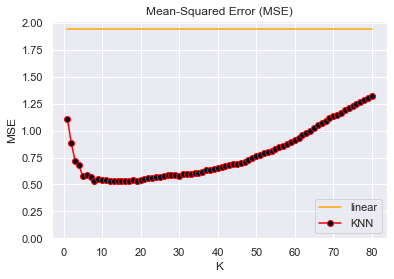

In [9]:
sns.set()

fig, ax = plt.subplots()

ax.plot(list(range(1, k)),
        mse_lin,
        color = 'orange',
        label = 'linear')

ax.plot(list(range(1, k)),
        mse_knn,
        color = 'red',
        marker = 'o',
        markerfacecolor = '#000C1F',
        label = 'KNN')

ax.legend(loc='lower right')
ax.set_title('Mean-Squared Error (MSE)')
ax.set_xlabel('K')
ax.set_ylabel('MSE')
plt.ylim(0);

# Non-parametric (KNN) model - not the best option
# Parametric (lienar) model - solve the problem

#### Make predictions only for K=1, 7 and 80

In [11]:
y_pred_knn = [] # only for k=1,7,80
for i in [1,7,80]:
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    reg_knn.fit(x_train.reshape(-1, 1), y_train)
    y_pred_knn.append(reg_knn.predict(x_test.reshape(-1, 1)))

#### Sort the data according to the test features

In [12]:
df = pd.DataFrame(data = {'x_test':list(x_test.flatten()),
                          'y_test':list(y_test.flatten()),
                          'y_pred_lin':list(y_pred_lin.flatten()),
                          'y_pred_knn-1':list(y_pred_knn[0].flatten()),
                          'y_pred_knn-7':list(y_pred_knn[1].flatten()),
                          'y_pred_knn-80':list(y_pred_knn[2].flatten())})

df = df.sort_values(by = ['x_test']) # ***

x_test_sorted = df['x_test'].tolist()
y_test_sorted = df['y_test'].tolist()
y_pred_lin_sorted = df['y_pred_lin'].tolist()
y_pred_knn1_sorted = df['y_pred_knn-1'].tolist()
y_pred_knn7_sorted = df['y_pred_knn-7'].tolist()
y_pred_knn80_sorted = df['y_pred_knn-80'].tolist()

#### Plot the regressions on top of the test data

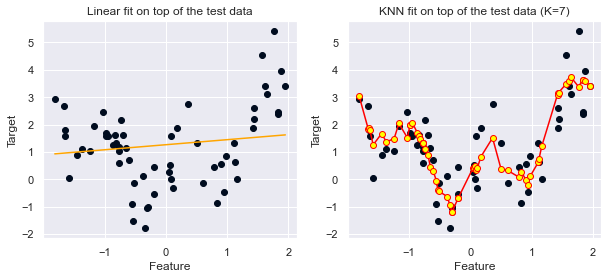

In [13]:
%matplotlib inline 

sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax1.plot(x_test_sorted, y_pred_lin_sorted, color = 'orange')
ax1.set_title('Linear fit on top of the test data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax2.plot(x_test_sorted, y_pred_knn7_sorted, color = 'red', marker = 'o', markerfacecolor = 'yellow')
ax2.set_title('KNN fit on top of the test data (K=7)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

#### Plot the regressions for K = 1,7, and 80 on top of the noiseless data

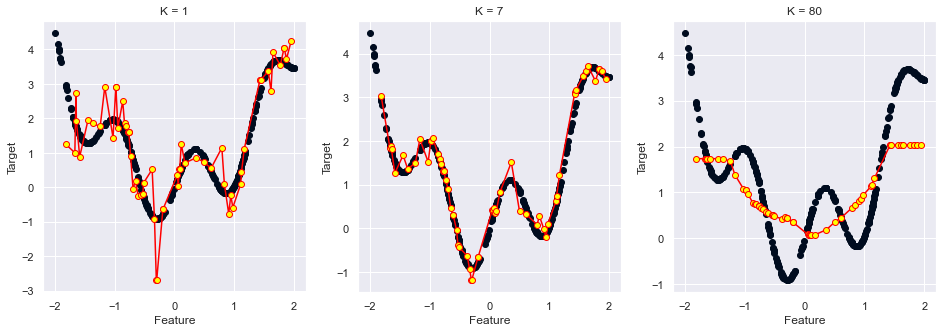

In [16]:
sns.set()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))

ax1.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax2.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax3.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')

ax1.plot(x_test_sorted, y_pred_knn1_sorted, color = 'red', marker = 'o', markerfacecolor = 'yellow')
ax1.set_title('K = 1')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.plot(x_test_sorted, y_pred_knn7_sorted, color = 'red', marker = 'o', markerfacecolor = 'yellow')
ax2.set_title('K = 7')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

ax3.plot(x_test_sorted, y_pred_knn80_sorted, color = 'red', marker = 'o', markerfacecolor = 'yellow')
ax3.set_title('K = 80')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Target');

#K=1 = overfitting the model
#K =7
#K=80 -missed